## XYZ Company has offices in four different zones. The company wishes to investigate the following :

    ● The mean sales generated by each zone.
    ● Total sales generated by all the zones for each month.
    ● Check whether all the zones generate the same amount of sales.

In [18]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
data= pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
data.shape

(29, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [7]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

## The mean sales generated by each zone.

In [20]:
data.mean().round(2)

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

Insights:  
   * Zone-D has highest mean sales.
   * Zone-A has lowest mean sales.

## Total sales generated by all the zones for each month.

In [22]:
#adding total sales column to the dataset
data['Total_sales']=data.sum(axis=1)
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_sales
0,Month - 1,1483525,1748451,1523308,2267260,14045088
1,Month - 2,1238428,1707421,2212113,1994341,14304606
2,Month - 3,1860771,2091194,1282374,1241600,12951878
3,Month - 4,1871571,1759617,2290580,2252681,16348898
4,Month - 5,1244922,1606010,1818334,1326062,11990656


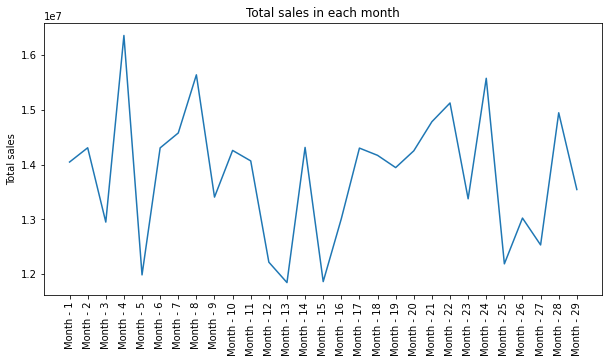

In [38]:
plt.figure(figsize=(10,5))
plt.plot(data['Month'],data['Total_sales'])
plt.title('Total sales in each month')
plt.ylabel('Total sales')
plt.xticks(rotation=90)
plt.show()

## Check whether all the zones generate the same amount of sales.

Teasting using ANOVA
Let,
   * H0 - All the zones generates the same amounr of sales
   * H1 - All the zones generates different amount of sales \
     alpha = 0.05

In [44]:
import scipy.stats as stats
fvalue,pvalue=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
print('p value: %.3f' %(pvalue))

p value: 0.001


   * Using ANOVA test, p value is 0.001 which is less than alpha(0.05) 
   * Null hypothesis is rejected \
   
   So, all the zones doesn't generate the same amount of sales
   